In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [63]:
#1. Use pandas to create a Series from the following data:

fruits = ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
type(fruits)

list

In [65]:
#1a. Name the variable that holds the series fruits.
fruits_series = pd.Series(fruits)
type(fruits_series)

pandas.core.series.Series

In [66]:
#1b. Run .describe() on the series to see what describe returns for a series of strings.

fruits_series.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [77]:
#1c. Run the code necessary to produce only the unique fruit names.

fruits_series.unique()

#or fruits.nunique() returns the count which is 13

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [78]:
#1d. Determine how many times each value occurs in the series.

fruits_series.value_counts()

kiwi                4
mango               2
papaya              1
watermelon          1
tomato              1
honeycrisp apple    1
blueberry           1
honeydew            1
pineapple           1
gooseberry          1
gala apple          1
strawberry          1
blackberry          1
dtype: int64

In [85]:
#1e. Determine the most frequently occurring fruit name from the series.

fruits_series.mode()
#or fruits_series.value_counts.head(1)
#or fruits_series.value_counts().idmax() *only returns the first occurrence of max value, but what if there's more than 1 row w/ max value?*
#or fruits.value_counts().nlargest(n=1, keep='all') #gives you all the max values cause of *nlargest and n=1*

0    kiwi
dtype: object

In [107]:
#1f. Determine the least frequently occurring fruit name from the series.

fruits_series.value_counts().nsmallest(keep = 'all') #you can also keep='first' or 'last'
#nsmallest function to account for duplicates

#or fruits.value_counts().tail(11)

papaya              1
watermelon          1
tomato              1
honeycrisp apple    1
blueberry           1
honeydew            1
pineapple           1
gooseberry          1
gala apple          1
strawberry          1
blackberry          1
dtype: int64

In [364]:
#1g. Write the code to get the longest string from the fruits series.

max(fruits_series, key = len)

#to find the largest item in an iterable
#max(iterable, *iterables, key, default)

# to find the largest item between two or more objects
#max(arg1, arg2, *args, key)

#max() Parameters
#iterable - an iterable such as list, tuple, set, dictionary, etc.
# *iterables (optional) - any number of iterables; can be more than one
# key (optional) - key function where the iterables are passed and comparison is performed based on its return value
# default (optional) - default value if the given iterable is empty
#*key can = str.lower, your own function def, lambda, etc

'honeycrisp apple'

In [109]:
#1h. Find the fruit(s) with 5 or more letters in the name.

fruits_series[fruits_series.str.len() >= 5]
# .str (converts to string) to use len()
# fruits.str.len to return chars >= 5
# then this would apply the argument if the length is >= 5, return the fruit

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [104]:
#1i. Capitalize all the fruit strings in the series.

fruits_series.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [111]:
#1j. Count the letter "a" in all the fruits (use string vectorization)
fruits_series.str.count('a')


0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [372]:
#1k. Output the number of vowels in each and every fruit.

vowel_counts = fruits_series.str.count(r'[aeiou]')
vowel_counts
#pass a regex pattern to the .count() string method that looks for any of the characters in the square brackets in each string value in my Series.

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [376]:
#side note: show name and vowel_counts
fruity_vowels = pd.DataFrame({'fruits': fruits_series, 'vowel_count': vowel_counts})
fruity_vowels           #'name of col': series_name, 'name of col you want':  #name of variable

,fruits,vowel_count
0,kiwi,2
1,mango,2
2,strawberry,2
3,pineapple,4
4,gala apple,4
5,honeycrisp apple,5
6,tomato,3
7,watermelon,4
8,honeydew,3
9,kiwi,2


In [379]:
#1l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

fruits_series[fruits_series.apply(lambda fruit: fruit.count('o') >=2)]

# Read this lambda function as, 'Return to me the fruit if the fruit meets my condition.'
# By passing this to the `apply()` function, it applies my lambda function to each value in my series `fruits`.

# Read this boolean indexing as, 'Return to me the value in the `fruits` Series WHERE my value is True.'

#syntax: lambda arguments : expression
#lambda function can take any # of args, but can only have 1 expression.


##another solution:
# fruits_series[fruits_series.str.count('o') >= 2]

6         tomato
15    gooseberry
dtype: object

In [128]:
#1m. Write the code to get only the fruits containing "berry" in the name

fruits_series[fruits_series.str.contains('berry')]
#using the same pattern as above:
#creating a bool Series for fruits that contain the string & using that bool Series as a selector for a subset of data from my fruits Series.

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [129]:
#1n. Write the code to get only the fruits containing "apple" in the name

fruits_series[fruits_series.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [380]:
#1o. Which fruit has the highest amount of vowels?

fruits_series[fruits_series.str.count(r'[aeiou]').max()]

'honeycrisp apple'

In [132]:
#2. Use pandas to create a Series from the following data:

data = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])
type(data)

pandas.core.series.Series

In [134]:
#2a. What is the data type of the series?
data.dtype

dtype('O')

In [381]:
#2b. Use series operations to convert the series to a numeric data type.
data_float = data.str.replace('$', '').str.replace(',', '')#you can add .astype('float') here too
d = data_float.astype('float') #save variable as float
d.dtype

#or data_float = data.str.replace('$', '').str.replace(',', '').astype('float')

dtype('float64')

In [162]:
#2c. What is the maximum value? The minimum?
d.max(), d.min()

(4789988.17, 278.6)

In [164]:
#2d. Bin the data into 4 equally sized intervals and show how many values fall into each bin.
pd.cut(d, bins = 4).value_counts()
# or d.value_counts(bins=4)

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

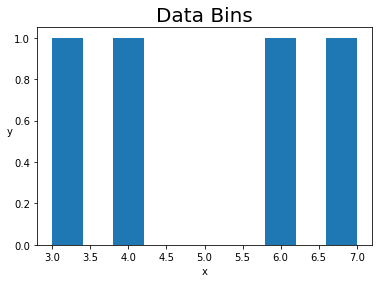

In [184]:
#2e. Plot a histogram of the data. Be sure to include a title and axis labels.
d.value_counts(bins=4).plot.hist()

plt.title('Data Bins', fontsize = 20)
plt.xlabel('x', fontsize = 10)
plt.ylabel('y', rotation = 0, fontsize = 10)

plt.show()

In [186]:
#3. Use pandas to create a Series from the following exam scores:

scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])
type(scores)

pandas.core.series.Series

In [189]:
#3a. What is the minimum exam score? The max, mean, median?
scores.min(), scores.max(), scores.mean(), scores.median()

(60, 96, 78.15, 79.0)

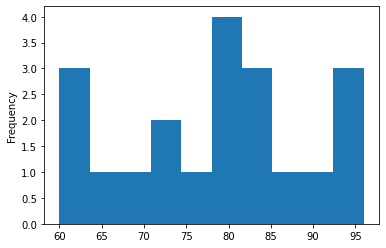

In [192]:
#3b. Plot a histogram of the scores.
scores.plot.hist()

plt.show()

In [197]:
#3c. Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.
def letter_grade(n):
    if n >= 90:
        return 'A'
    elif n >= 80:
        return 'B'
    elif n >= 70:
        return 'C'
    elif n >= 60:
        return 'D'
    else:
        return 'F'
grades = scores.apply(lambda score: letter_grade(score))
print(grades)

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object


In [382]:
#3c cont'd. 
#A = 90-100
#B = 80-89
#C = 70-79
#D = 60-69
#F = < 60

# Define bin edges.
bin_edges = [0, 60, 70, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

# Use the .cut() function to create 5 bins as defined and labeled and create Series of value_counts sorted by index value.
pd.cut(scores, bins=bin_edges, labels=bin_labels).value_counts().sort_index()


F    2
D    3
C    6
B    5
A    4
dtype: int64

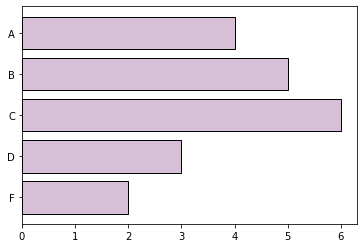

In [387]:

# Plot and title the code above

pd.cut(scores, 
       bins=bin_edges, 
       labels=bin_labels,
       include_lowest=True).value_counts().sort_index().plot.barh(color='thistle',
                                                                  ec='black',
                                                                  width=.8)


plt.show()

In [199]:
#3d. Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, and that many points should be given to every other score as well.
curve = (100 - scores.max()) + scores

curve

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

In [389]:
#extra practice:
# Define bin edges.
bin_edges = [0, 60, 70, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

# Check out counts
pd.cut(curve, bins=bin_edges, labels=bin_labels).value_counts().sort_index()

F    0
D    4
C    4
B    8
A    4
dtype: int64

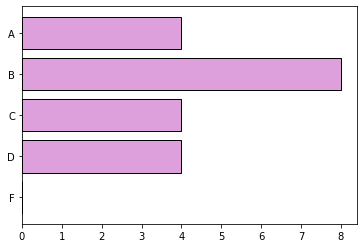

In [391]:
# Create and plot bins
pd.cut(curve, 
       bins=bin_edges, 
       labels=bin_labels,
       include_lowest=True).value_counts().sort_index().plot.barh(color='plum',
                                                                  ec='black',
                                                                  width=.8)


plt.show()

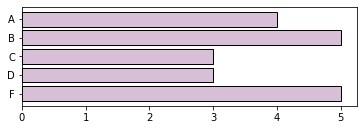

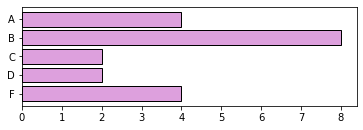

In [393]:
#Can combine into subplots:
# Define bin edges.
bin_edges = [0, 70, 75, 80, 90, 101]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['F', 'D', 'C', 'B', 'A']

##################### first plot #################################

plt.subplot(2,1,1)

# code to plot letter grades

pd.cut(scores, 
       bins=bin_edges, 
       labels=bin_labels,
       include_lowest=True).value_counts().sort_index().plot.barh(color='thistle',
                                                                  ec='black',
                                                                  width=.8)

plt.show()

##################### second plot ################################

plt.subplot(2,1,2)

# code to plot curved letter grades

pd.cut(curve, 
       bins=bin_edges, 
       labels=bin_labels).value_counts().sort_index().plot.barh(color='plum',
                                                                ec='black',
                                                                width=.8)


plt.show()

In [223]:
#4. Use pandas to create a Series from the following string:

'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

#convert this string to a list for the questions below:
string = list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
)
string

['h',
 'n',
 'v',
 'i',
 'd',
 'd',
 'u',
 'c',
 'k',
 'k',
 'q',
 'x',
 'w',
 'y',
 'm',
 'b',
 'i',
 'm',
 'k',
 'c',
 'c',
 'e',
 'x',
 'b',
 'k',
 'm',
 'q',
 'y',
 'g',
 'k',
 'x',
 'o',
 'y',
 'n',
 'd',
 'm',
 'c',
 'x',
 'n',
 'w',
 'q',
 'a',
 'r',
 'h',
 'y',
 'f',
 'f',
 's',
 'j',
 'p',
 's',
 'r',
 'a',
 'b',
 't',
 'j',
 'z',
 's',
 'y',
 'p',
 'm',
 'z',
 'a',
 'd',
 'f',
 'a',
 'v',
 'y',
 'r',
 'n',
 'n',
 'd',
 'n',
 'd',
 'v',
 's',
 'w',
 'r',
 'e',
 'a',
 'u',
 'x',
 'o',
 'v',
 'n',
 'c',
 'x',
 't',
 'w',
 'z',
 'p',
 'w',
 'e',
 'j',
 'i',
 'l',
 'z',
 'j',
 'r',
 'm',
 'm',
 'b',
 'b',
 'g',
 'b',
 'y',
 'x',
 'v',
 'j',
 't',
 'e',
 'w',
 'q',
 't',
 'h',
 'a',
 'f',
 'n',
 'b',
 'k',
 'q',
 'p',
 'l',
 'a',
 'r',
 'o',
 'k',
 'k',
 'y',
 'y',
 'd',
 't',
 'u',
 'b',
 'b',
 'm',
 'n',
 'e',
 'x',
 'o',
 'y',
 'p',
 'u',
 'l',
 'z',
 'w',
 'f',
 'h',
 'q',
 'v',
 'c',
 'k',
 'd',
 'p',
 'q',
 't',
 'p',
 'o',
 'p',
 'p',
 'z',
 'q',
 'r',
 'm',
 'c',
 'v',
 'h'

In [224]:
#make string list into pd series:
string = pd.Series(string)
type(string)

pandas.core.series.Series

In [238]:
#4a. What is the most frequently occuring letter? 
string.mode()

#or string[string.value_counts().max()]
#or string.value_counts()nlargest(n=1, keep ='all')

0    y
dtype: object

In [239]:
#4a cont. Least frequently occuring?
string.value_counts().nsmallest(keep = 'first').head(1)

#or string.value_counts().nsmallest(n=1, keep='all')

l    4
dtype: int64

In [260]:
#4b. How many vowels are in the list?
vowels = ['a','e','i','o','u']
string.isin(vowels).sum()

#or string.str.lower().str.count(r'[aeiou]').sum()

34

In [267]:
#4c. How many consonants are in the list?
consonants = ['b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','y','z']
string.isin(consonants).sum()

# string.str.lower().str.count(r'[^aeiou]').sum()
                                # ^ means 'not in'

166

In [265]:
#4d. Create a series that has all of the same letters, but uppercased
uppercase_string = pd.Series(string.str.upper())
uppercase_string

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

<AxesSubplot:>

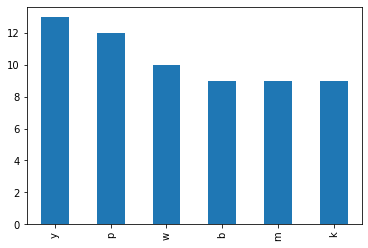

In [285]:
#4e. Create a bar plot of the frequencies of the 6 most frequently occuring letters.
most_frequent = string.value_counts().head(6)
most_frequent


most_frequent.plot.bar()


In [299]:
#5. Complete the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a, but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.

# 17 list comprehension problems in python

fruits = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]

# Example for loop solution to add 1 to each number in the list
numbers_plus_one = []
for number in numbers:
    numbers_plus_one.append(number + 1)

# Example of using a list comprehension to create a list of the numbers plus one.
numbers_plus_one = [number + 1 for number in numbers]

# Example code that creates a list of all of the list of strings in fruits and uppercases every string
output = []
for fruit in fruits:
    output.append(fruit.upper())

In [303]:
fruits = pd.Series(fruits)
type(fruits)

pandas.core.series.Series

In [327]:
numbers = pd.Series(numbers)
type(numbers)

pandas.core.series.Series

In [305]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. Make a variable named uppercased_fruits to hold the output of the list comprehension. Output should be ['MANGO', 'KIWI', etc...]
uppercased_fruits = fruits.str.upper()
uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [306]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output like ['Mango', 'Kiwi', 'Strawberry', etc...]
capitalized_fruits = fruits.str.capitalize()
capitalized_fruits

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

In [312]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. Hint: You'll need a way to check if something is a vowel.
fruits_with_more_than_two_vowels = fruits[fruits.str.count('[aeiou]') > 2]

fruits_with_more_than_two_vowels

3              guava
4          pineapple
5    mandarin orange
dtype: object

In [313]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels. The result should be ['mango', 'kiwi', 'strawberry']
fruits_with_only_two_vowels = fruits[fruits.str.count('[aeiou]') == 2]
fruits_with_only_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

In [316]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters
more_than_5 = fruits[fruits.str.len() > 5]
more_than_5

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

In [317]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters
exactly_5 = fruits[fruits.str.len() == 5]
exactly_5

0    mango
3    guava
dtype: object

In [320]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters
less_than_5 = fruits[fruits.str.len() < 5]
less_than_5

1    kiwi
dtype: object

In [326]:
# Exercise 8 - Make a list containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]
characters = fruits.str.len()
characters

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [325]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"
fruits_with_letter_a = fruits[fruits.str.contains('a')]
fruits_with_letter_a

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [331]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 
even_numbers = numbers[numbers % 2 == 0]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

In [332]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers
odd_numbers = numbers[numbers %2 != 0]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

In [333]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers
positive_numbers = numbers[numbers > 0]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

In [334]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers
negative_numbers = numbers[numbers < 0]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

In [337]:
# Exercise 14 - use a list comprehension w/ a conditional in order to produce a list of numbers with 2 or more numerals
two_or_more_numerals = numbers[(numbers > 9) & (numbers < 100) & (numbers > -100) | (numbers < -9)]
two_or_more_numerals

# 2 or more numerals = a double digit (any # greater than 9 and less than 100)
# take into acct the inverse of that, since negative numbers can be double digits too

8     10
9     11
10    13
11    17
12    19
13    23
dtype: int64

In [339]:
# Exercise 15 - Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]
numbers_squared = numbers ** 2
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [345]:
# Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.
odd_negative_numbers = numbers[(numbers % 2 != 0) & (numbers <0)]
odd_negative_numbers

19   -9
dtype: int64

In [347]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 
numbers_plus_5 = numbers + 5
numbers_plus_5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

In [394]:
# BONUS Make a variable named "primes" that is a list containing the prime numbers in the numbers list. 
#*Hint* you may want to make or find a helper function that determines if a given number is prime or not.

def prime_nums(num):
    if (num <= 1):
        return False
    for n in range(2, num):
        if (num % n == 0):
            return False
    return True
    for num in numbers:
        if all(number % numbers != 0 in range(2, number)):
            return numbers


primes = numbers[numbers.apply(prime_nums)]
primes

0      2
1      3
3      5
5      7
9     11
10    13
11    17
12    19
13    23
18     5
dtype: int64